In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  quality  
0         

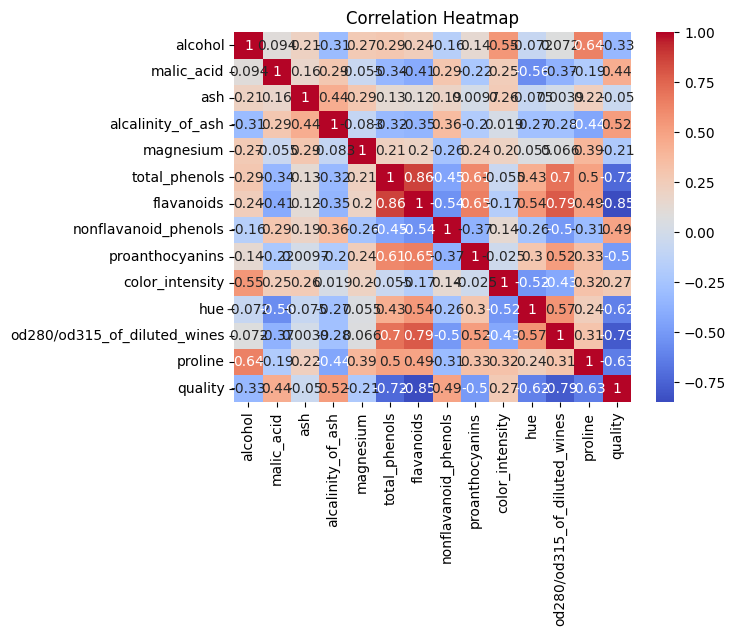

In [4]:
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['quality'] = wine_data.target

print(df.head())
print(df.describe())
print(df.info())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [6]:
print(df.isnull().sum())
X = df.drop('quality', axis=1)  # Features (exclude the 'quality' column)
y = df['quality']  # Target (wine quality)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64


Mean Squared Error (MSE): 0.06853348464256002
R² Score: 0.8825140263270399
Mean Absolute Error (MAE): 0.2030472595661309
Explained Variance Score: 0.8826275483099183
Cross-Validation R² Scores: [0.         0.51460008 0.         0.40252695 0.        ]
Mean Cross-Validation R² Score: 0.1834254055942523


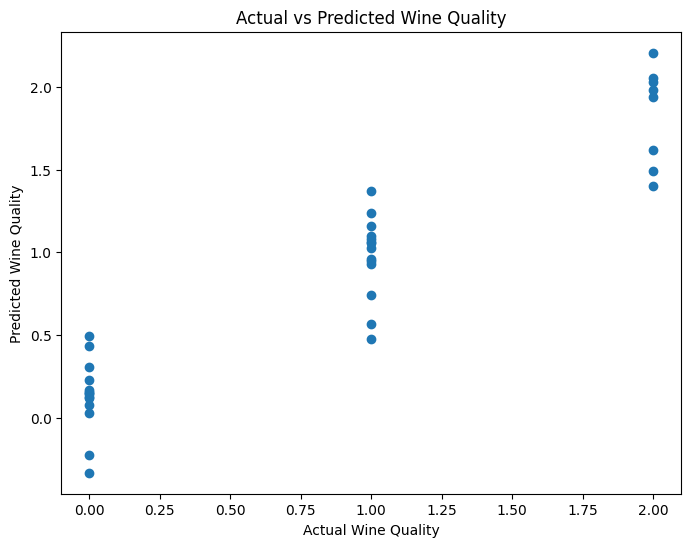

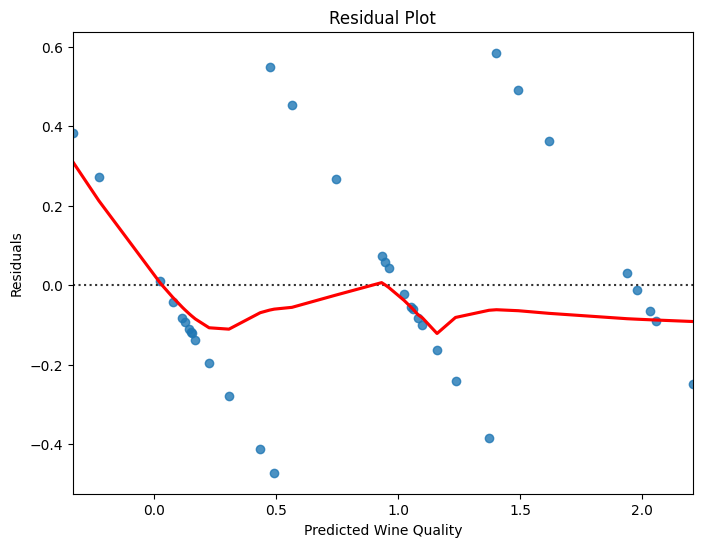

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score: {evs}")

cross_val_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cross_val_scores)
print("Mean Cross-Validation R² Score:", np.mean(cross_val_scores))


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()


plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


